In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

#from pmdarima import auto_arima
import statsmodels.api as sm

In [4]:
combined_aqi = pd.read_csv("..//data/CombinedData/combined_aqi.csv")
combined_aqi

,year,month,day,station,PM2.5 (µg/m³),PM10 (µg/m³),NOx (µg/m³),CO (µg/m³),SO2 (µg/m³),Ozone (µg/m³),datetime,NOx_SubIndex,SO2_SubIndex,AQI_calculated,PM2.5_24_avg,CO_8_avg,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,AQI_Bucket
0,2021,1,1,alandur,28.000000,219.0300,29.177600,710.0,8.220000,14.220000,2021-01-01 15:00:00,36,10,36.0,20.414375,697.5000,34.0,35,Good
1,2021,1,1,alandur,25.520000,219.0300,29.234000,720.0,8.060000,8.880000,2021-01-01 16:00:00,37,10,37.0,20.714706,700.0000,35.0,35,Good
2,2021,1,1,alandur,25.230000,219.0300,29.328000,700.0,8.190000,2.940000,2021-01-01 17:00:00,37,10,37.0,20.965556,700.0000,35.0,35,Good
3,2021,1,1,alandur,25.580000,219.0300,29.140000,700.0,8.330000,1.100000,2021-01-01 18:00:00,36,10,36.0,21.208421,701.2500,35.0,35,Good
4,2021,1,1,alandur,24.770000,219.0300,29.177600,700.0,8.060000,1.100000,2021-01-01 19:00:00,36,10,36.0,21.386500,701.2500,36.0,35,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92902,2023,12,31,velachery,22.172500,69.8975,36.923200,1670.0,11.097500,27.360000,2023-12-31 19:00:00,46,14,46.0,27.610903,912.8125,46.0,46,Good
92903,2023,12,31,velachery,26.697500,72.8500,37.534200,1405.0,11.090000,28.410000,2023-12-31 20:00:00,47,14,49.0,27.197257,972.1875,45.0,49,Good
92904,2023,12,31,velachery,27.570000,79.3550,28.594800,1317.5,11.150000,27.705000,2023-12-31 21:00:00,36,14,52.0,26.784757,1043.4375,45.0,52,Satisfactory
92905,2023,12,31,velachery,26.042500,81.6225,28.834500,1477.5,11.307500,25.022500,2023-12-31 22:00:00,36,14,57.0,26.505590,1131.8750,44.0,57,Satisfactory


In [5]:
combined_aqi.set_index(combined_aqi['datetime'], inplace=True)

In [6]:
combined_aqi.index = pd.to_datetime(combined_aqi.index)

In [7]:
combined_aqi.drop(columns=['datetime'], inplace=True)

In [8]:
combined_aqi

,year,month,day,station,PM2.5 (µg/m³),PM10 (µg/m³),NOx (µg/m³),CO (µg/m³),SO2 (µg/m³),Ozone (µg/m³),NOx_SubIndex,SO2_SubIndex,AQI_calculated,PM2.5_24_avg,CO_8_avg,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,AQI_Bucket
datetime,,,,,,,,,,,,,,,,,,
2021-01-01 15:00:00,2021,1,1,alandur,28.000000,219.0300,29.177600,710.0,8.220000,14.220000,36,10,36.0,20.414375,697.5000,34.0,35,Good
2021-01-01 16:00:00,2021,1,1,alandur,25.520000,219.0300,29.234000,720.0,8.060000,8.880000,37,10,37.0,20.714706,700.0000,35.0,35,Good
2021-01-01 17:00:00,2021,1,1,alandur,25.230000,219.0300,29.328000,700.0,8.190000,2.940000,37,10,37.0,20.965556,700.0000,35.0,35,Good
2021-01-01 18:00:00,2021,1,1,alandur,25.580000,219.0300,29.140000,700.0,8.330000,1.100000,36,10,36.0,21.208421,701.2500,35.0,35,Good
2021-01-01 19:00:00,2021,1,1,alandur,24.770000,219.0300,29.177600,700.0,8.060000,1.100000,36,10,36.0,21.386500,701.2500,36.0,35,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,2023,12,31,velachery,22.172500,69.8975,36.923200,1670.0,11.097500,27.360000,46,14,46.0,27.610903,912.8125,46.0,46,Good
2023-12-31 20:00:00,2023,12,31,velachery,26.697500,72.8500,37.534200,1405.0,11.090000,28.410000,47,14,49.0,27.197257,972.1875,45.0,49,Good
2023-12-31 21:00:00,2023,12,31,velachery,27.570000,79.3550,28.594800,1317.5,11.150000,27.705000,36,14,52.0,26.784757,1043.4375,45.0,52,Satisfactory


In [9]:
combined_aqi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92907 entries, 2021-01-01 15:00:00 to 2023-12-31 23:00:00
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    92907 non-null  int64  
 1   month                   92907 non-null  int64  
 2   day                     92907 non-null  int64  
 3   station                 92907 non-null  object 
 4   PM2.5 (µg/m³)           92907 non-null  float64
 5   PM10 (µg/m³)            92907 non-null  float64
 6   NOx (µg/m³)             92907 non-null  float64
 7   CO (µg/m³)              92907 non-null  float64
 8   SO2 (µg/m³)             92907 non-null  float64
 9   Ozone (µg/m³)           92907 non-null  float64
 10  NOx_SubIndex            92907 non-null  int64  
 11  SO2_SubIndex            92907 non-null  int64  
 12  AQI_calculated          92907 non-null  float64
 13  PM2.5_24_avg            92907 non-null  float64
 14  CO_

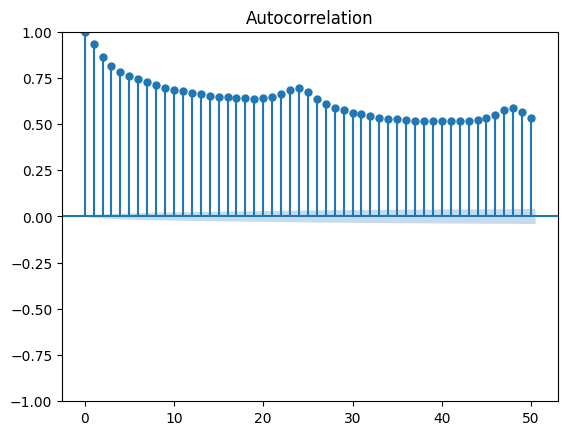

In [10]:
acf_plot = plot_acf(combined_aqi['AQI_calculated'])

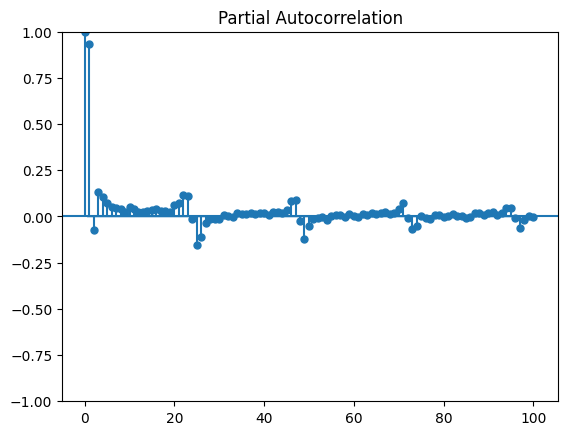

In [11]:
pacf_plot = plot_pacf(combined_aqi['AQI_calculated'], lags = 100)

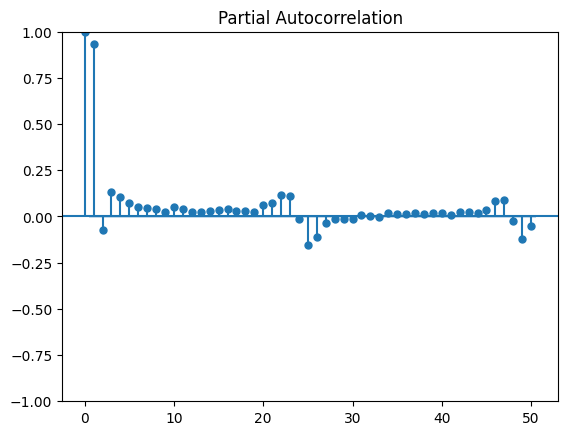

In [12]:
pacf_plot = plot_pacf(combined_aqi['AQI_calculated'])

In [13]:
print(combined_aqi.index[combined_aqi.index.duplicated()])


DatetimeIndex(['2021-01-01 15:00:00', '2021-01-01 16:00:00',
               '2021-01-01 17:00:00', '2021-01-01 18:00:00',
               '2021-01-01 19:00:00', '2021-01-01 20:00:00',
               '2021-01-01 21:00:00', '2021-01-01 22:00:00',
               '2021-01-01 23:00:00', '2021-01-02 00:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=59586, freq=None)


In [14]:
combined_aqi = combined_aqi[~combined_aqi.index.duplicated()]


In [15]:
combined_aqi = combined_aqi.asfreq('H')


/tmp/ipykernel_15033/2596666683.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  combined_aqi = combined_aqi.asfreq('H')


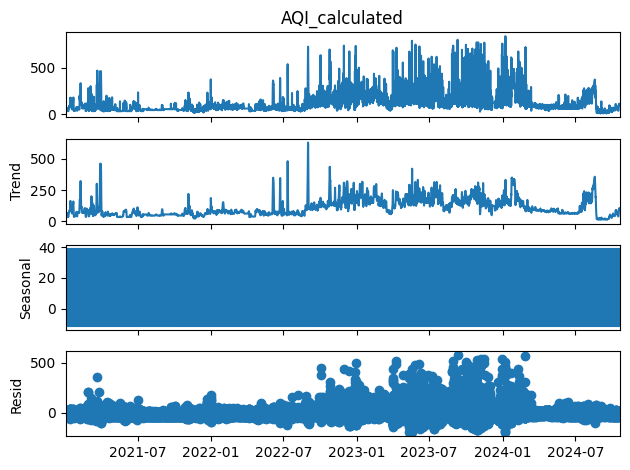

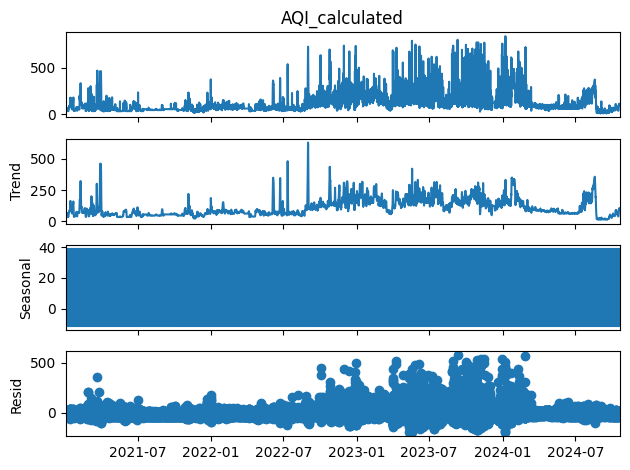

In [16]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(combined_aqi['AQI_calculated'], period=24)
decomp.plot()

In [17]:
train_end = datetime(2023, 2, 25)
test_end = datetime(2023, 3, 25)

train_data = combined_aqi[:train_end]['AQI_calculated']
test_data = combined_aqi[train_end + timedelta(days=1):test_end]['AQI_calculated']

In [18]:
train_data

datetime
2021-01-01 15:00:00     36.0
2021-01-01 16:00:00     37.0
2021-01-01 17:00:00     37.0
2021-01-01 18:00:00     36.0
2021-01-01 19:00:00     36.0
                       ...  
2023-02-24 20:00:00     97.0
2023-02-24 21:00:00     96.0
2023-02-24 22:00:00     95.0
2023-02-24 23:00:00     94.0
2023-02-25 00:00:00    184.0
Freq: h, Name: AQI_calculated, Length: 18826, dtype: float64

In [19]:
test_data

datetime
2023-02-26 00:00:00    276.0
2023-02-26 01:00:00    412.0
2023-02-26 02:00:00    361.0
2023-02-26 03:00:00    300.0
2023-02-26 04:00:00    253.0
                       ...  
2023-03-24 20:00:00     62.0
2023-03-24 21:00:00     53.0
2023-03-24 22:00:00     53.0
2023-03-24 23:00:00     52.0
2023-03-25 00:00:00     52.0
Freq: h, Name: AQI_calculated, Length: 649, dtype: float64